In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

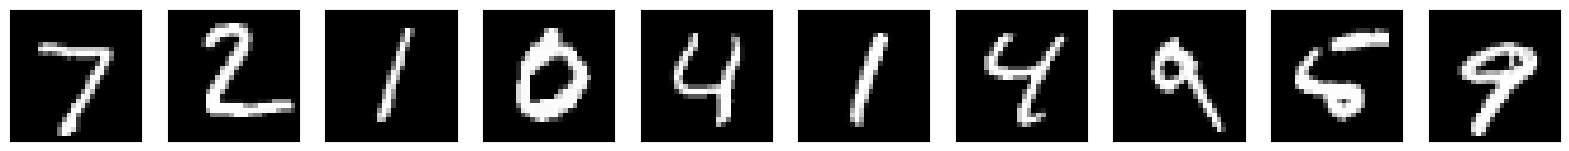

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many records we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

![image.png](attachment:image.png)

In [6]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, UpSampling2D, Reshape

In [34]:
encode_model = Sequential()

############
# Encoding #
############

## FIRST SET OF LAYERS
# CONVOLUTIONAL LAYER
encode_model.add(Conv2D(filters=16, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
# POOLING LAYER
encode_model.add(MaxPool2D(pool_size=(2, 2),  padding='same'))

## SECOND SET OF LAYERS
# CONVOLUTIONAL LAYER
encode_model.add(Conv2D(filters=8, kernel_size=(3,3), padding = 'same', activation='relu'))
# POOLING LAYER
encode_model.add(MaxPool2D(pool_size=(2, 2), padding='same'))

## THIRD SET OF LAYERS
# CONVOLUTIONAL LAYER
encode_model.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
# POOLING LAYER
encode_model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
encode_model.add(Flatten(input_shape=[7,7,8]))
encode_model.add(Dense(7*7*8, activation="relu"))
encode_model.add(Dense(30, activation="relu"))
encode_model.add(Dense(25, activation="relu"))

encode_model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_80 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_81 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 7, 7, 8)           0         
 ng2D)                                                           
                                                                 
 conv2d_82 (Conv2D)          (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 3, 3, 8)         

In [66]:
############
# Decoding #
############
decode_model=Sequential()

decode_model.add(Dense(30,input_shape=[25],activation='relu'))

decode_model.add(Dense(7 * 7 * 8, activation="relu"))
decode_model.add(Reshape([7, 7, 8]))

# DeConv1
decode_model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'))
# Upsampling LAYER
decode_model.add(UpSampling2D((2, 2)))

# DeConv2
decode_model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'))
# Upsampling LAYER
decode_model.add(UpSampling2D((2, 2)))

# Deconv3
decode_model.add(Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same'))
# Upsampling LAYER
# decode_model.add(UpSampling2D((2, 2)))

decode_model.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 30)                780       
                                                                 
 dense_54 (Dense)            (None, 392)               12152     
                                                                 
 reshape_26 (Reshape)        (None, 7, 7, 8)           0         
                                                                 
 conv2d_131 (Conv2D)         (None, 7, 7, 8)           584       
                                                                 
 up_sampling2d_54 (UpSampli  (None, 14, 14, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_132 (Conv2D)         (None, 14, 14, 16)        1168      
                                                     

In [67]:
autoencoder = Sequential([encode_model, decode_model])

In [45]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics = 'accuracy')

In [68]:
autoencoder.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_25 (Sequential)  (None, 25)                43085     
                                                                 
 sequential_39 (Sequential)  (None, 28, 28, 1)         14829     
                                                                 
Total params: 57914 (226.23 KB)
Trainable params: 57914 (226.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
encode_model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_80 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_81 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 7, 7, 8)           0         
 ng2D)                                                           
                                                                 
 conv2d_82 (Conv2D)          (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 3, 3, 8)         

In [70]:
decode_model.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 30)                780       
                                                                 
 dense_54 (Dense)            (None, 392)               12152     
                                                                 
 reshape_26 (Reshape)        (None, 7, 7, 8)           0         
                                                                 
 conv2d_131 (Conv2D)         (None, 7, 7, 8)           584       
                                                                 
 up_sampling2d_54 (UpSampli  (None, 14, 14, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_132 (Conv2D)         (None, 14, 14, 16)        1168      
                                                     

In [71]:
x_train = x_train.reshape(60000,28,28,1)
x_train = x_train/255
x_train.shape()

TypeError: 'tuple' object is not callable

In [72]:
x_train = x_train/225
x_train = x_train/255

In [73]:
x_test = x_test.reshape(10000, 28, 28, 1)
x_test = x_test/255
x_test.shape

(10000, 28, 28, 1)

In [74]:
x_test = x_test/225
x_test = x_test/255

In [75]:
# Train the model
autoencoder.fit(x=x_train, y=x_train,  epochs=10, batch_size=32, shuffle=True, verbose=1, validation_data=(x_test, x_test))

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))
for i in range():
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
